# Example : k times repetition with the list of k input files 

DeepBiome package takes microbiome abundance data as input and uses the phylogenetic taxonomy to guide the decision of the optimal number of layers and neurons in the deep learning architecture.

To use DeepBiome, you can experiment (1) __k times repetition__ or (2) __k fold cross-validation__.
For each experiment, we asuume that the dataset is given by
- __A list of k input files for k times repetition.__
- __One input file for k fold cross-validation.__

This notebook contains an example of (1) __k times repetition__ for the deep neural netowrk using deepbiome.

## 1. Load library

First, we have to load deepbiome package. The deepbiome package is build on the tensorflow and keras library

In [1]:
import os
import logging
import json
from pkg_resources import resource_filename

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from deepbiome import deepbiome

Using TensorFlow backend.


## 2. Prepare the dataset

In this example, we assume that we have __a list of k input files for k times repetition.__

DeepBiome needs 4 data files as follows:
1. __the tree information__
1. __the lists of the input files__ (each file has all sample's information for one repetition)
1. __the list of the names of input files__ 
1. __y__

In addition, we can set __the training index for each repetition__. If we set the index file, DeepBiome builds the training set for each repetition based on each fold index in the index file. If not, DeepBiome will generate the index file locally.


Eath data should have the csv format. Below is the example of each file.

### Example of the tree information

First we need a file about the phylogenetic tree information. This tree information file should have the format below:

In [2]:
tree_information = pd.read_csv(resource_filename('deepbiome', 'tests/data/genus48_dic.csv'))
tree_information

,Genus,Family,Order,Class,Phylum,Domain
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes,Bacteria
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes,Bacteria
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Clostridia,Firmicutes,Bacteria
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria,Bacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria


### Example of the list of the name of input files

In this example. we assume that input is given by the lists of files. Each file has all sample's information for one repeatition.
If we want to use the list of the input files, we need to make a list of the names of each input file. Below is an example file for `k=1000` repetition.

In [3]:
list_of_input_files = pd.read_csv(resource_filename('deepbiome', 'tests/data/gcount_list.csv'), header=None)
list_of_input_files.head()

,0
0,gcount_0001.csv
1,gcount_0002.csv
2,gcount_0003.csv
3,gcount_0004.csv
4,gcount_0005.csv


In [4]:
list_of_input_files.tail()

,0
995,gcount_0996.csv
996,gcount_0997.csv
997,gcount_0998.csv
998,gcount_0999.csv
999,gcount_1000.csv


### Example of the lists of the input files

Below is an example of each input file. This example has 1000 samples as rows, and the abandunce of each microbiome as columns. Below is an example file for `k=1000` repetition. This example is `gcount_0001.csv` for the first repetition in the list of the names of input files above. This file has the 4 samples' microbiome abandunce.

In [5]:
x_1 = pd.read_csv(resource_filename('deepbiome', 'tests/data/count/%s' % list_of_input_files.iloc[0,0]))
x_1.head()

,Streptococcus,Tropheryma,Veillonella,Actinomyces,Flavobacterium,Prevotella,Porphyromonas,Parvimonas,Fusobacterium,Propionibacterium,...,Microbacterium,Sphingomonas,Chryseobacterium,Bacteroides,Bdellovibrio,Streptophyta,Lachnospiracea_incertae_sedis,Paracoccus,Fastidiosipila,Pseudonocardia
0,841,0,813,505,5,3224,0,362,11,65,...,0,87,0,0,0,0,0,0,0,2133
1,1445,0,1,573,0,1278,82,85,69,154,...,0,1,2,0,0,0,0,0,0,3638
2,1259,0,805,650,0,1088,0,0,74,0,...,0,2,8,1,39,0,0,0,0,3445
3,982,0,327,594,0,960,81,19,9,0,...,157,1,0,4,60,0,0,0,0,3507
4,1162,0,130,969,163,1515,167,4,162,3,...,0,9,0,0,0,0,60,0,0,3945


In [6]:
x_1.tail()

,Streptococcus,Tropheryma,Veillonella,Actinomyces,Flavobacterium,Prevotella,Porphyromonas,Parvimonas,Fusobacterium,Propionibacterium,...,Microbacterium,Sphingomonas,Chryseobacterium,Bacteroides,Bdellovibrio,Streptophyta,Lachnospiracea_incertae_sedis,Paracoccus,Fastidiosipila,Pseudonocardia
995,1401,4,30,526,0,923,25,0,127,0,...,0,0,7,0,0,0,0,0,0,4470
996,2655,6,106,74,0,952,76,13,158,125,...,0,2,0,0,0,0,0,0,0,2826
997,335,0,71,259,67,718,1,4,4,167,...,0,246,0,0,6,0,0,0,0,6527
998,649,69,966,1227,0,508,2,30,550,0,...,0,0,0,0,0,6,0,0,0,4402
999,1258,0,0,1119,0,2348,25,0,137,176,...,0,2,0,0,0,0,0,0,0,2585


### Example of the Y (regression)

This is an example of the output file for regression problem. One column contains y samples for one repeatition. 
For each repeatition (column) has outputs of 4 samples for each repeatition. Below example file has 1000 samples in row, `k=1000` repetition in column.

In [7]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/regression_y.csv'))
y.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x991,x992,x993,x994,x995,x996,x997,x998,x999,x1000
0,4.997270,5.492354,5.473725,1.759484,5.313252,1.500044,4.949712,5.493533,3.743509,5.492373,...,2.793883,1.500004,5.487526,5.493518,3.599047,5.491461,5.486244,5.487390,5.493492,3.762523
1,5.004092,1.500002,4.640348,1.538071,5.491065,5.481009,5.492323,2.968531,3.576358,5.491456,...,1.500033,3.369529,1.500016,3.103297,5.493214,3.831125,5.492104,5.474811,5.492416,3.268805
2,5.485126,4.187426,5.491340,5.469662,5.490478,1.953375,5.494656,3.741680,4.862400,5.490701,...,5.491728,2.459981,5.475697,3.114158,1.500004,1.500019,4.113815,5.470539,5.494373,5.481754
3,5.489590,4.863187,1.500003,5.484699,5.492657,5.491270,4.091023,5.495239,5.492804,1.500046,...,1.500034,1.500012,5.483070,2.475049,5.493846,3.287076,3.696412,5.487583,1.500044,2.760404
4,1.500001,5.480769,5.489725,1.500044,2.695212,5.492262,3.381424,4.805420,1.500047,5.474376,...,1.500046,2.586990,5.440610,4.376103,1.500030,4.713223,5.491059,3.230658,1.500045,5.488727


In [8]:
y.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x991,x992,x993,x994,x995,x996,x997,x998,x999,x1000
995,2.609926,5.491258,3.318610,5.444070,2.884154,5.486857,5.496554,1.500019,5.482893,1.824835,...,4.478641,5.485122,4.915985,4.073239,1.500019,5.492295,1.500005,1.559586,5.496415,4.171127
996,5.488959,3.739806,5.489474,1.500021,5.492632,1.500019,5.484813,5.467055,5.491282,1.874777,...,5.498820,5.493926,5.487404,3.162812,1.846298,5.492417,1.919107,5.480324,5.467765,5.457627
997,3.498418,4.250451,5.488116,4.162031,5.494052,5.472900,1.500057,5.491497,5.491935,1.500033,...,1.966474,5.475258,3.848034,2.863883,4.370685,5.494647,5.478855,2.465739,1.500018,5.486403
998,5.486107,1.917414,5.414975,5.492364,2.027914,5.491349,5.494135,5.491245,1.500039,1.500019,...,4.556995,5.457072,2.071106,5.417333,5.491818,5.473390,4.374154,5.489109,4.515340,1.500020
999,5.319623,5.482776,1.500035,5.485141,5.491019,3.733982,5.494374,3.077159,5.493188,1.500001,...,5.485356,1.500059,5.400762,5.489606,5.494583,5.490943,5.123794,5.473465,3.274979,3.700653


For one repeatition, the deepbiome will use the one column.

In [9]:
y.iloc[:,0].head()

0    4.997270
1    5.004092
2    5.485126
3    5.489590
4    1.500001
Name: x1, dtype: float64

In [10]:
y.iloc[:,0].tail()

995    2.609926
996    5.488959
997    3.498418
998    5.486107
999    5.319623
Name: x1, dtype: float64

### Example of the Y (classification)

This is an example of the output file for classification problem. Below example file has 1000 samples in rows, 1000 repetitions in columns.

In [11]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/classification_y.csv'))
y.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [12]:
y.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
995,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
996,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
997,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
998,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
999,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


For one repeatition, the deepbiome will use the one column.

In [13]:
y.iloc[:,0].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: V1, dtype: float64

In [14]:
y.iloc[:,0].tail()

995    1.0
996    0.0
997    1.0
998    0.0
999    1.0
Name: V1, dtype: float64

### Exmple of the training index file for repetition

For each repeatition, we have to set the training and test set. If the index file is given, the deepbiome library set the training set and test set based on the index file. Below is the example of the index file. Each column has the training indexs for each repeatition. The deepbiome will only use the samples in this index set for training.

In [15]:
idxs = pd.read_csv(resource_filename('deepbiome', 'tests/data/regression_idx.csv'), dtype=np.int)
idxs.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,490,690,62,703,690,845,150,268,488,179,...,675,886,225,222,781,778,603,222,254,407
1,498,968,123,913,348,262,705,239,632,44,...,636,216,495,557,196,516,23,351,472,945
2,389,999,335,947,215,696,793,349,734,624,...,626,230,26,330,470,992,329,532,655,426
3,51,139,843,491,47,421,892,32,438,996,...,956,706,836,151,80,409,671,772,882,181
4,592,83,204,810,198,955,357,125,190,162,...,542,108,959,311,771,902,986,481,922,305


In [16]:
idxs.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
745,599,824,997,216,586,796,806,39,483,518,...,573,861,366,374,585,871,140,597,795,743
746,720,633,821,149,339,461,750,194,769,699,...,913,570,670,249,840,889,242,959,791,954
747,80,268,661,187,929,469,481,332,781,615,...,985,459,965,888,461,551,465,827,557,662
748,570,32,750,332,902,107,281,667,917,793,...,924,662,975,199,32,715,668,241,299,518
749,440,589,607,597,380,961,747,396,649,974,...,867,839,234,99,901,19,821,450,780,326


Below is the index set for 1st repetition. From 1000 samples above, it uses 750 samples for training.

In [17]:
idxs.iloc[:,0].head()

0    490
1    498
2    389
3     51
4    592
Name: V1, dtype: int64

In [18]:
idxs.iloc[:,0].tail()

745    599
746    720
747     80
748    570
749    440
Name: V1, dtype: int64

## 3. Prepare the configuration

For detailed configuration, we used python dictionary as inputs for the main training function.
You can build the configuration information for the network training by:
1. the python dictionary format
1. the configufation file (.cfg).

In this notebook, we showed the dictionary python dictionary format configuration.

Please check the detailed information about each options in the [documantation](https://young-won.github.io/deepbiome/prerequisites.html#configuration)

### For preparing the configuration about the network information (`network_info`)

For giving the information about the training hyper-parameter, you have to provide the dictionary for configuration to the `netowrk_info` field.
Your configuration for the network training should include the information about:

In [19]:
network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'lr': '0.01',
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure',
        'network_class': 'DeepBiomeNetwork',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'normalizer': 'normalize_minmax',
    },
    'training_info': {
        'batch_size': '50', 
        'epochs': '100'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

### For preparing the configuration about the path information (`path_info`)

To give the information about the path of dataset, paths for saving the trained weights and the evaluation results, we provide the dictionary for configuration to the `path_info` feild.
Your configuration for the path information should include the information about:

In [20]:
path_info = {
    'data_info': {
        'count_list_path': resource_filename('deepbiome', 'tests/data/gcount_list.csv'),
        'count_path': resource_filename('deepbiome', 'tests/data/count'),
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'idx_path': resource_filename('deepbiome', 'tests/data/classification_idx.csv'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': '',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'evaluation': 'eval.npy',
        'history': 'hist.json',
        'model_dir': './example_result/',
        'weight': 'weight.h5'
    }
}

## 4. DeepBiome Training

Now we can train the DeepBiome network based on the configurations.

For logging, we use the python logging library.

In [21]:
logging.basicConfig(format = '[%(name)-8s|%(levelname)s|%(filename)s:%(lineno)s] %(message)s',
                    level=logging.DEBUG)
log = logging.getLogger()

The deeobiome_train function provide the test evaluation, train evaluation and the deepbiome network instance.

If we set `number_of_fold`, then the deepbiome package do the cross-validation based on that value. If not, the deepbiome package do the cross-validation based on the index file. If both `number_of_fold` option and the index file is not given, then the library do leave-one-out-cross-validation (LOOCV).

In [22]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, network_info, path_info, number_of_fold=3)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:518] Phylogenetic tree level list: ['Ge

Instructions for updating:
Colocations handled automatically by placer.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/resource_variable_ops.py:432: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
[root    |INFO|build_network.py:648] ------------------------------------------------------------------------------------------


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Instructions for updating:
Use tf.cast instead.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:2862: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 1s 1ms/step - loss: 0.6651 - binary_accuracy: 0.6617 - sensitivity: 0.9192 - specificity: 0.0784 - gmeasure: 0.0141 - auc: 0.4752 - val_loss: 0.6395 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4818
Epoch 2/100
600/600 [==============================] - 0s 226us/step - loss: 0.6291 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5025 - val_loss: 0.6128 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5015
Epoch 3/100
600/600 [==============================] - 0s 206us/step - loss: 0.6227 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5128 - val_loss: 0.6115 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - va

Epoch 25/100
600/600 [==============================] - 0s 192us/step - loss: 0.6207 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7581 - val_loss: 0.6113 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7484
Epoch 26/100
600/600 [==============================] - 0s 176us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7647 - val_loss: 0.6111 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7440
Epoch 27/100
600/600 [==============================] - 0s 195us/step - loss: 0.6207 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7671 - val_loss: 0.6113 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 49/100
600/600 [==============================] - 0s 207us/step - loss: 0.6203 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8020 - val_loss: 0.6107 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7525
Epoch 50/100
600/600 [==============================] - 0s 211us/step - loss: 0.6198 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8096 - val_loss: 0.6108 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7549
Epoch 51/100
600/600 [==============================] - 0s 202us/step - loss: 0.6192 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8026 - val_loss: 0.6110 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 73/100
600/600 [==============================] - 0s 219us/step - loss: 0.5852 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8369 - val_loss: 0.5879 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7988
Epoch 74/100
600/600 [==============================] - 0s 230us/step - loss: 0.5805 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8295 - val_loss: 0.5846 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.8012
Epoch 75/100
600/600 [==============================] - 0s 217us/step - loss: 0.5761 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8354 - val_loss: 0.5810 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

[root    |INFO|build_network.py:151] Training end with time 15.849582433700562!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_0.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.014268636703491211!
[root    |INFO|build_network.py:183] Evaluation: [0.41470539569854736, 0.8173333406448364, 0.9498069286346436, 0.5215517282485962, 0.7038277387619019, 0.8984614014625549]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 24us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.013792037963867188!
[root    |INFO|build_network.py:183] Evaluation: [0.42274555563926697, 0.8399999737739563, 0.9822485446929932, 0.5432098507881165, 0.7304567694664001, 0.9060559868812561]
[root    |INFO|deepbiome.py:179] Compute time : 19.22468662261963
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.p

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 1s 996us/step - loss: 0.6800 - binary_accuracy: 0.6850 - sensitivity: 0.9167 - specificity: 0.0833 - gmeasure: 0.0000e+00 - auc: 0.4414 - val_loss: 0.6638 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4313
Epoch 2/100
600/600 [==============================] - 0s 221us/step - loss: 0.6502 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.3866 - val_loss: 0.6346 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.3529
Epoch 3/100
600/600 [==============================] - 0s 202us/step - loss: 0.6238 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.3297 - val_loss: 0.6102 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.000

Epoch 25/100
600/600 [==============================] - 0s 207us/step - loss: 0.5767 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7407 - val_loss: 0.5795 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6837
Epoch 26/100
600/600 [==============================] - 0s 198us/step - loss: 0.5747 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7296 - val_loss: 0.5776 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6879
Epoch 27/100
600/600 [==============================] - 0s 210us/step - loss: 0.5718 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7269 - val_loss: 0.5752 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

600/600 [==============================] - 0s 201us/step - loss: 0.3745 - binary_accuracy: 0.8250 - sensitivity: 0.9835 - specificity: 0.4014 - gmeasure: 0.6069 - auc: 0.9236 - val_loss: 0.3891 - val_binary_accuracy: 0.8800 - val_sensitivity: 0.9714 - val_specificity: 0.6474 - val_gmeasure: 0.7909 - val_auc: 0.8963
Epoch 50/100
600/600 [==============================] - 0s 205us/step - loss: 0.3602 - binary_accuracy: 0.8483 - sensitivity: 0.9831 - specificity: 0.4749 - gmeasure: 0.6686 - auc: 0.9335 - val_loss: 0.3733 - val_binary_accuracy: 0.8467 - val_sensitivity: 1.0000 - val_specificity: 0.4503 - val_gmeasure: 0.6666 - val_auc: 0.9017
Epoch 51/100
600/600 [==============================] - 0s 174us/step - loss: 0.3492 - binary_accuracy: 0.8717 - sensitivity: 0.9841 - specificity: 0.5543 - gmeasure: 0.7121 - auc: 0.9450 - val_loss: 0.3963 - val_binary_accuracy: 0.8000 - val_sensitivity: 1.0000 - val_specificity: 0.2740 - val_gmeasure: 0.5177 - val_auc: 0.9097
Epoch 52/100
600/600 [=

Epoch 74/100
600/600 [==============================] - 0s 228us/step - loss: 0.2274 - binary_accuracy: 0.9167 - sensitivity: 0.9799 - specificity: 0.7378 - gmeasure: 0.8462 - auc: 0.9676 - val_loss: 0.3146 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.9632 - val_specificity: 0.6127 - val_gmeasure: 0.7668 - val_auc: 0.9266
Epoch 75/100
600/600 [==============================] - 0s 221us/step - loss: 0.2225 - binary_accuracy: 0.9200 - sensitivity: 0.9817 - specificity: 0.7530 - gmeasure: 0.8537 - auc: 0.9670 - val_loss: 0.3159 - val_binary_accuracy: 0.8733 - val_sensitivity: 0.9632 - val_specificity: 0.6384 - val_gmeasure: 0.7811 - val_auc: 0.9284
Epoch 76/100
600/600 [==============================] - 0s 193us/step - loss: 0.2263 - binary_accuracy: 0.9050 - sensitivity: 0.9849 - specificity: 0.7036 - gmeasure: 0.8293 - auc: 0.9697 - val_loss: 0.3039 - val_binary_accuracy: 0.8867 - val_sensitivity: 0.9632 - val_specificity: 0.6918 - val_gmeasure: 0.8124 - val_auc: 0.9304
Epoch 77/1

Epoch 99/100
600/600 [==============================] - 0s 205us/step - loss: 0.1956 - binary_accuracy: 0.9183 - sensitivity: 0.9730 - specificity: 0.7771 - gmeasure: 0.8631 - auc: 0.9801 - val_loss: 0.2804 - val_binary_accuracy: 0.9067 - val_sensitivity: 0.9632 - val_specificity: 0.7682 - val_gmeasure: 0.8578 - val_auc: 0.9436
Epoch 100/100
600/600 [==============================] - 0s 188us/step - loss: 0.1999 - binary_accuracy: 0.9083 - sensitivity: 0.9625 - specificity: 0.7556 - gmeasure: 0.8467 - auc: 0.9830 - val_loss: 0.2903 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9632 - val_specificity: 0.7196 - val_gmeasure: 0.8289 - val_auc: 0.9449


[root    |INFO|build_network.py:151] Training end with time 14.82160210609436!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_1.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 6us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.01217961311340332!
[root    |INFO|build_network.py:183] Evaluation: [0.2018193006515503, 0.9279999732971191, 0.976190447807312, 0.7990196347236633, 0.8831734657287598, 0.9702919721603394]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 21us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.012906551361083984!
[root    |INFO|build_network.py:183] Evaluation: [0.3040628135204315, 0.8880000114440918, 0.954023003578186, 0.7368420958518982, 0.8384296894073486, 0.932773768901825]
[root    |INFO|deepbiome.py:179] Compute time : 16.38786482810974
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------3 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 3 simulation
[root    |INFO|build_network.py:5

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 1s 1ms/step - loss: 0.6701 - binary_accuracy: 0.6700 - sensitivity: 0.9495 - specificity: 0.0441 - gmeasure: 0.0381 - auc: 0.5415 - val_loss: 0.6565 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5673
Epoch 2/100
600/600 [==============================] - 0s 236us/step - loss: 0.6304 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6214 - val_loss: 0.6471 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6013
Epoch 3/100
600/600 [==============================] - 0s 253us/step - loss: 0.6211 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6069 - val_loss: 0.6543 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - va

Epoch 25/100
600/600 [==============================] - 0s 221us/step - loss: 0.4999 - binary_accuracy: 0.7183 - sensitivity: 0.9690 - specificity: 0.1727 - gmeasure: 0.3474 - auc: 0.8792 - val_loss: 0.5249 - val_binary_accuracy: 0.6800 - val_sensitivity: 1.0000 - val_specificity: 0.0657 - val_gmeasure: 0.2065 - val_auc: 0.8963
Epoch 26/100
600/600 [==============================] - 0s 214us/step - loss: 0.5027 - binary_accuracy: 0.7400 - sensitivity: 0.9573 - specificity: 0.2724 - gmeasure: 0.4810 - auc: 0.8869 - val_loss: 0.4997 - val_binary_accuracy: 0.7867 - val_sensitivity: 0.9691 - val_specificity: 0.4433 - val_gmeasure: 0.6555 - val_auc: 0.9087
Epoch 27/100
600/600 [==============================] - 0s 222us/step - loss: 0.4697 - binary_accuracy: 0.7450 - sensitivity: 0.9427 - specificity: 0.3038 - gmeasure: 0.5255 - auc: 0.8864 - val_loss: 0.4848 - val_binary_accuracy: 0.7533 - val_sensitivity: 0.9907 - val_specificity: 0.3171 - val_gmeasure: 0.5591 - val_auc: 0.9104
Epoch 28/1

Epoch 50/100
600/600 [==============================] - 0s 214us/step - loss: 0.3007 - binary_accuracy: 0.8617 - sensitivity: 0.8717 - specificity: 0.8372 - gmeasure: 0.8495 - auc: 0.9353 - val_loss: 0.3245 - val_binary_accuracy: 0.8733 - val_sensitivity: 0.9192 - val_specificity: 0.7817 - val_gmeasure: 0.8473 - val_auc: 0.9382
Epoch 51/100
600/600 [==============================] - 0s 226us/step - loss: 0.2933 - binary_accuracy: 0.8750 - sensitivity: 0.8851 - specificity: 0.8515 - gmeasure: 0.8658 - auc: 0.9370 - val_loss: 0.3136 - val_binary_accuracy: 0.8733 - val_sensitivity: 0.9097 - val_specificity: 0.8039 - val_gmeasure: 0.8552 - val_auc: 0.9402
Epoch 52/100
600/600 [==============================] - 0s 218us/step - loss: 0.2896 - binary_accuracy: 0.8767 - sensitivity: 0.8792 - specificity: 0.8750 - gmeasure: 0.8737 - auc: 0.9423 - val_loss: 0.3202 - val_binary_accuracy: 0.8800 - val_sensitivity: 0.9192 - val_specificity: 0.8039 - val_gmeasure: 0.8596 - val_auc: 0.9445
Epoch 53/1

Epoch 75/100
600/600 [==============================] - 0s 214us/step - loss: 0.2320 - binary_accuracy: 0.9117 - sensitivity: 0.9049 - specificity: 0.9278 - gmeasure: 0.9150 - auc: 0.9587 - val_loss: 0.2748 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9007 - val_specificity: 0.8883 - val_gmeasure: 0.8936 - val_auc: 0.9517
Epoch 76/100
600/600 [==============================] - 0s 224us/step - loss: 0.2293 - binary_accuracy: 0.9133 - sensitivity: 0.9057 - specificity: 0.9343 - gmeasure: 0.9186 - auc: 0.9591 - val_loss: 0.2913 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.9192 - val_specificity: 0.7656 - val_gmeasure: 0.8389 - val_auc: 0.9549
Epoch 77/100
600/600 [==============================] - 0s 210us/step - loss: 0.2241 - binary_accuracy: 0.9067 - sensitivity: 0.9132 - specificity: 0.8917 - gmeasure: 0.9019 - auc: 0.9577 - val_loss: 0.2697 - val_binary_accuracy: 0.8800 - val_sensitivity: 0.8822 - val_specificity: 0.8883 - val_gmeasure: 0.8837 - val_auc: 0.9494
Epoch 78/1

Epoch 100/100
600/600 [==============================] - 0s 218us/step - loss: 0.2014 - binary_accuracy: 0.9267 - sensitivity: 0.9228 - specificity: 0.9360 - gmeasure: 0.9292 - auc: 0.9649 - val_loss: 0.2488 - val_binary_accuracy: 0.9067 - val_sensitivity: 0.9316 - val_specificity: 0.8738 - val_gmeasure: 0.9015 - val_auc: 0.9640


[root    |INFO|build_network.py:151] Training end with time 15.262919902801514!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_2.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_2.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_2.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 8us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.014128923416137695!
[root    |INFO|build_network.py:183] Evaluation: [0.2123630940914154, 0.9173333048820496, 0.9041095972061157, 0.9456067085266113, 0.9246253967285156, 0.967468798160553]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 21us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.012145757675170898!
[root    |INFO|build_network.py:183] Evaluation: [0.24281755089759827, 0.9039999842643738, 0.9269663095474243, 0.8472222089767456, 0.8861977458000183, 0.9503355026245117]
[root    |INFO|deepbiome.py:179] Compute time : 16.86178183555603
[root    |INFO|deepbiome.py:180] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.27629593 0.88755554 0.94336899 0.75539269 0.83720887 0.94540739]
[root    |INFO|deepbiome.py:189]        std : [0.09796488 0.04984518 0.02977692 0.17584679 0.09582087 0.03321583]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:1

`deepbiome_train` saves the trained model weights, evaluation results and history based on the path information from the configuration.

From the example above, we can check that `hist_*.json`, `weight_*.h5`, `test_eval.npy`, `train_eval.npy` files were saved.

In [23]:
os.listdir(path_info['model_info']['model_dir'])

['hist_0.json',
 'weight_2.h5',
 'test_eval.npy',
 'weight_0.h5',
 'train_eval.npy',
 'hist_2.json',
 'weight_1.h5',
 'hist_1.json']

Lets check the history files.

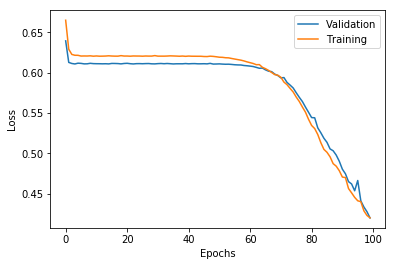

In [24]:
with open('./%s/hist_0.json' % path_info['model_info']['model_dir'], 'r') as f:
    history = json.load(f)
    
plt.plot(history['val_loss'], label='Validation')
plt.plot(history['loss'], label='Training')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Test evauation and train evauation is the numpy array of the shape (number of fold, number of evaluation measures).

In [25]:
test_evaluation

array([[0.42274556, 0.83999997, 0.98224854, 0.54320985, 0.73045677,
        0.90605599],
       [0.30406281, 0.88800001, 0.954023  , 0.7368421 , 0.83842969,
        0.93277377],
       [0.24281755, 0.90399998, 0.92696631, 0.84722221, 0.88619775,
        0.9503355 ]])

In [26]:
train_evaluation

array([[0.4147054 , 0.81733334, 0.94980693, 0.52155173, 0.70382774,
        0.8984614 ],
       [0.2018193 , 0.92799997, 0.97619045, 0.79901963, 0.88317347,
        0.97029197],
       [0.21236309, 0.9173333 , 0.9041096 , 0.94560671, 0.9246254 ,
        0.9674688 ]])

## 5. Load the pre-trained network for training

If you have pre-trianed model, you can use the pre-trained weight for next training. For using pre-trained weights, you have to use `warm_start` option in `training_inro` with addding the file path of the pre-trained weights in the `warm_start_model` option. Below is the example:

In [27]:
warm_start_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'training_info': {
        'warm_start':'True',
        'warm_start_model':'./example_result/weight.h5',
        'batch_size': '200',
        'epochs': '100'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [28]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, warm_start_network_info, path_info, 
                                                                       number_of_fold=3)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:518] Phylogenetic tree level list: ['Ge

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_0.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 798us/step - loss: 0.4161 - binary_accuracy: 0.8133 - sensitivity: 0.9660 - specificity: 0.4726 - gmeasure: 0.6735 - auc: 0.9011 - val_loss: 0.4189 - val_binary_accuracy: 0.8133 - val_sensitivity: 0.9333 - val_specificity: 0.5333 - val_gmeasure: 0.7055 - val_auc: 0.8899
Epoch 2/100
600/600 [==============================] - 0s 60us/step - loss: 0.4156 - binary_accuracy: 0.8400 - sensitivity: 0.9351 - specificity: 0.6339 - gmeasure: 0.7691 - auc: 0.9019 - val_loss: 0.4145 - val_binary_accuracy: 0.7867 - val_sensitivity: 0.9333 - val_specificity: 0.4444 - val_gmeasure: 0.6441 - val_auc: 0.8912
Epoch 3/100
600/600 [==============================] - 0s 65us/step - loss: 0.4073 - binary_accuracy: 0.8133 - sensitivity: 0.9659 - specificity: 0.4756 - gmeasure: 0.6775 - auc: 0.9035 - val_loss: 0.4166 - val_binary_accuracy: 0.7800 - val_sensitivity: 0.9714 - val_specificity: 0.3333 - val_gmea

Epoch 26/100
600/600 [==============================] - 0s 71us/step - loss: 0.3506 - binary_accuracy: 0.8467 - sensitivity: 0.9449 - specificity: 0.6263 - gmeasure: 0.7678 - auc: 0.9208 - val_loss: 0.3533 - val_binary_accuracy: 0.8533 - val_sensitivity: 0.9048 - val_specificity: 0.7333 - val_gmeasure: 0.8146 - val_auc: 0.9157
Epoch 27/100
600/600 [==============================] - 0s 67us/step - loss: 0.3492 - binary_accuracy: 0.8500 - sensitivity: 0.9352 - specificity: 0.6637 - gmeasure: 0.7876 - auc: 0.9225 - val_loss: 0.3508 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9048 - val_specificity: 0.6889 - val_gmeasure: 0.7895 - val_auc: 0.9168
Epoch 28/100
600/600 [==============================] - 0s 61us/step - loss: 0.3482 - binary_accuracy: 0.8533 - sensitivity: 0.9469 - specificity: 0.6480 - gmeasure: 0.7831 - auc: 0.9234 - val_loss: 0.3490 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9048 - val_specificity: 0.6889 - val_gmeasure: 0.7895 - val_auc: 0.9178
Epoch 29/100


Epoch 51/100
600/600 [==============================] - 0s 70us/step - loss: 0.3110 - binary_accuracy: 0.8600 - sensitivity: 0.9298 - specificity: 0.7065 - gmeasure: 0.8084 - auc: 0.9351 - val_loss: 0.3193 - val_binary_accuracy: 0.8600 - val_sensitivity: 0.8857 - val_specificity: 0.8000 - val_gmeasure: 0.8418 - val_auc: 0.9266
Epoch 52/100
600/600 [==============================] - 0s 71us/step - loss: 0.3082 - binary_accuracy: 0.8683 - sensitivity: 0.9323 - specificity: 0.7269 - gmeasure: 0.8225 - auc: 0.9360 - val_loss: 0.3195 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8762 - val_specificity: 0.8444 - val_gmeasure: 0.8602 - val_auc: 0.9268
Epoch 53/100
600/600 [==============================] - 0s 70us/step - loss: 0.3065 - binary_accuracy: 0.8667 - sensitivity: 0.9199 - specificity: 0.7479 - gmeasure: 0.8290 - auc: 0.9370 - val_loss: 0.3173 - val_binary_accuracy: 0.8600 - val_sensitivity: 0.8857 - val_specificity: 0.8000 - val_gmeasure: 0.8418 - val_auc: 0.9261
Epoch 54/100


Epoch 76/100
600/600 [==============================] - 0s 68us/step - loss: 0.2849 - binary_accuracy: 0.8683 - sensitivity: 0.9091 - specificity: 0.7837 - gmeasure: 0.8437 - auc: 0.9462 - val_loss: 0.3021 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8762 - val_specificity: 0.8444 - val_gmeasure: 0.8602 - val_auc: 0.9319
Epoch 77/100
600/600 [==============================] - 0s 73us/step - loss: 0.2785 - binary_accuracy: 0.8800 - sensitivity: 0.9294 - specificity: 0.7682 - gmeasure: 0.8449 - auc: 0.9456 - val_loss: 0.2988 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9238 - val_specificity: 0.8222 - val_gmeasure: 0.8715 - val_auc: 0.9319
Epoch 78/100
600/600 [==============================] - 0s 70us/step - loss: 0.2814 - binary_accuracy: 0.8717 - sensitivity: 0.9419 - specificity: 0.7165 - gmeasure: 0.8215 - auc: 0.9460 - val_loss: 0.3012 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8762 - val_specificity: 0.8444 - val_gmeasure: 0.8602 - val_auc: 0.9321
Epoch 79/100


[root    |INFO|build_network.py:151] Training end with time 6.324186563491821!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_0.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 9us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.014736413955688477!
[root    |INFO|build_network.py:183] Evaluation: [0.2681126594543457, 0.8786666393280029, 0.9343629479408264, 0.7543103694915771, 0.8395234942436218, 0.9488583207130432]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 20us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.012296676635742188!
[root    |INFO|build_network.py:183] Evaluation: [0.2787688076496124, 0.8759999871253967, 0.9585798978805542, 0.7037037014961243, 0.8213136792182922, 0.9507268667221069]
[root    |INFO|deepbiome.py:179] Compute time : 8.100970029830933
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.py

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_1.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 776us/step - loss: 0.1934 - binary_accuracy: 0.9283 - sensitivity: 0.9886 - specificity: 0.7692 - gmeasure: 0.8714 - auc: 0.9791 - val_loss: 0.2795 - val_binary_accuracy: 0.9000 - val_sensitivity: 0.9541 - val_specificity: 0.7561 - val_gmeasure: 0.8494 - val_auc: 0.9403
Epoch 2/100
600/600 [==============================] - 0s 67us/step - loss: 0.1960 - binary_accuracy: 0.9350 - sensitivity: 0.9378 - specificity: 0.9263 - gmeasure: 0.9319 - auc: 0.9784 - val_loss: 0.2953 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9633 - val_specificity: 0.7073 - val_gmeasure: 0.8254 - val_auc: 0.9389
Epoch 3/100
600/600 [==============================] - 0s 59us/step - loss: 0.1838 - binary_accuracy: 0.9200 - sensitivity: 0.9860 - specificity: 0.7399 - gmeasure: 0.8531 - auc: 0.9789 - val_loss: 0.3213 - val_binary_accuracy: 0.8867 - val_sensitivity: 0.9817 - val_specificity: 0.6341 - val_gmea

Epoch 26/100
600/600 [==============================] - 0s 83us/step - loss: 0.1597 - binary_accuracy: 0.9400 - sensitivity: 0.9770 - specificity: 0.8413 - gmeasure: 0.9062 - auc: 0.9837 - val_loss: 0.2759 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9633 - val_specificity: 0.7073 - val_gmeasure: 0.8254 - val_auc: 0.9488
Epoch 27/100
600/600 [==============================] - 0s 71us/step - loss: 0.1594 - binary_accuracy: 0.9450 - sensitivity: 0.9748 - specificity: 0.8652 - gmeasure: 0.9182 - auc: 0.9841 - val_loss: 0.2703 - val_binary_accuracy: 0.9000 - val_sensitivity: 0.9633 - val_specificity: 0.7317 - val_gmeasure: 0.8396 - val_auc: 0.9497
Epoch 28/100
600/600 [==============================] - 0s 62us/step - loss: 0.1582 - binary_accuracy: 0.9450 - sensitivity: 0.9749 - specificity: 0.8696 - gmeasure: 0.9204 - auc: 0.9853 - val_loss: 0.2787 - val_binary_accuracy: 0.9000 - val_sensitivity: 0.9633 - val_specificity: 0.7317 - val_gmeasure: 0.8396 - val_auc: 0.9499
Epoch 29/100


Epoch 51/100
600/600 [==============================] - 0s 70us/step - loss: 0.1361 - binary_accuracy: 0.9550 - sensitivity: 0.9841 - specificity: 0.8817 - gmeasure: 0.9309 - auc: 0.9883 - val_loss: 0.2478 - val_binary_accuracy: 0.9133 - val_sensitivity: 0.9725 - val_specificity: 0.7561 - val_gmeasure: 0.8575 - val_auc: 0.9575
Epoch 52/100
600/600 [==============================] - 0s 68us/step - loss: 0.1368 - binary_accuracy: 0.9600 - sensitivity: 0.9746 - specificity: 0.9152 - gmeasure: 0.9442 - auc: 0.9895 - val_loss: 0.2476 - val_binary_accuracy: 0.9133 - val_sensitivity: 0.9725 - val_specificity: 0.7561 - val_gmeasure: 0.8575 - val_auc: 0.9579
Epoch 53/100
600/600 [==============================] - 0s 72us/step - loss: 0.1363 - binary_accuracy: 0.9583 - sensitivity: 0.9864 - specificity: 0.8849 - gmeasure: 0.9340 - auc: 0.9876 - val_loss: 0.2665 - val_binary_accuracy: 0.9133 - val_sensitivity: 0.9817 - val_specificity: 0.7317 - val_gmeasure: 0.8475 - val_auc: 0.9573
Epoch 54/100


Epoch 76/100
600/600 [==============================] - 0s 68us/step - loss: 0.1248 - binary_accuracy: 0.9617 - sensitivity: 0.9909 - specificity: 0.8839 - gmeasure: 0.9355 - auc: 0.9907 - val_loss: 0.2476 - val_binary_accuracy: 0.9200 - val_sensitivity: 0.9817 - val_specificity: 0.7561 - val_gmeasure: 0.8615 - val_auc: 0.9602
Epoch 77/100
600/600 [==============================] - 0s 68us/step - loss: 0.1237 - binary_accuracy: 0.9617 - sensitivity: 0.9710 - specificity: 0.9383 - gmeasure: 0.9539 - auc: 0.9908 - val_loss: 0.2245 - val_binary_accuracy: 0.9267 - val_sensitivity: 0.9633 - val_specificity: 0.8293 - val_gmeasure: 0.8938 - val_auc: 0.9611
Epoch 78/100
600/600 [==============================] - 0s 65us/step - loss: 0.1163 - binary_accuracy: 0.9683 - sensitivity: 0.9822 - specificity: 0.9322 - gmeasure: 0.9568 - auc: 0.9903 - val_loss: 0.2657 - val_binary_accuracy: 0.9200 - val_sensitivity: 0.9908 - val_specificity: 0.7317 - val_gmeasure: 0.8515 - val_auc: 0.9595
Epoch 79/100


[root    |INFO|build_network.py:151] Training end with time 6.270015716552734!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_1.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 9us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.014514684677124023!
[root    |INFO|build_network.py:183] Evaluation: [0.12617357075214386, 0.9653333425521851, 0.9853479862213135, 0.9117646813392639, 0.947842538356781, 0.985859751701355]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 23us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.012951135635375977!
[root    |INFO|build_network.py:183] Evaluation: [0.2848759889602661, 0.9079999923706055, 0.959770143032074, 0.7894737124443054, 0.8704673051834106, 0.9521324634552002]
[root    |INFO|deepbiome.py:179] Compute time : 8.087581872940063
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------3 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 3 simulation
[root    |INFO|build_network.py:

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_2.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:141] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 760us/step - loss: 0.2191 - binary_accuracy: 0.9033 - sensitivity: 0.9142 - specificity: 0.8903 - gmeasure: 0.9003 - auc: 0.9679 - val_loss: 0.2551 - val_binary_accuracy: 0.9000 - val_sensitivity: 0.9286 - val_specificity: 0.8462 - val_gmeasure: 0.8864 - val_auc: 0.9628
Epoch 2/100
600/600 [==============================] - 0s 66us/step - loss: 0.2087 - binary_accuracy: 0.9217 - sensitivity: 0.9017 - specificity: 0.9673 - gmeasure: 0.9334 - auc: 0.9702 - val_loss: 0.2460 - val_binary_accuracy: 0.9000 - val_sensitivity: 0.9082 - val_specificity: 0.8846 - val_gmeasure: 0.8963 - val_auc: 0.9625
Epoch 3/100
600/600 [==============================] - 0s 66us/step - loss: 0.2047 - binary_accuracy: 0.9183 - sensitivity: 0.9121 - specificity: 0.9312 - gmeasure: 0.9212 - auc: 0.9650 - val_loss: 0.2914 - val_binary_accuracy: 0.8733 - val_sensitivity: 0.9388 - val_specificity: 0.7500 - val_gmea

Epoch 26/100
600/600 [==============================] - 0s 66us/step - loss: 0.1759 - binary_accuracy: 0.9300 - sensitivity: 0.9270 - specificity: 0.9341 - gmeasure: 0.9303 - auc: 0.9714 - val_loss: 0.2445 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9388 - val_specificity: 0.8077 - val_gmeasure: 0.8708 - val_auc: 0.9670
Epoch 27/100
600/600 [==============================] - 0s 67us/step - loss: 0.1741 - binary_accuracy: 0.9333 - sensitivity: 0.9265 - specificity: 0.9453 - gmeasure: 0.9358 - auc: 0.9728 - val_loss: 0.2512 - val_binary_accuracy: 0.8867 - val_sensitivity: 0.9388 - val_specificity: 0.7885 - val_gmeasure: 0.8603 - val_auc: 0.9694
Epoch 28/100
600/600 [==============================] - 0s 64us/step - loss: 0.1734 - binary_accuracy: 0.9333 - sensitivity: 0.9297 - specificity: 0.9420 - gmeasure: 0.9358 - auc: 0.9727 - val_loss: 0.2545 - val_binary_accuracy: 0.8867 - val_sensitivity: 0.9388 - val_specificity: 0.7885 - val_gmeasure: 0.8603 - val_auc: 0.9690
Epoch 29/100


Epoch 51/100
600/600 [==============================] - 0s 64us/step - loss: 0.1534 - binary_accuracy: 0.9400 - sensitivity: 0.9274 - specificity: 0.9671 - gmeasure: 0.9470 - auc: 0.9785 - val_loss: 0.2547 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9490 - val_specificity: 0.7885 - val_gmeasure: 0.8650 - val_auc: 0.9739
Epoch 52/100
600/600 [==============================] - 0s 66us/step - loss: 0.1522 - binary_accuracy: 0.9467 - sensitivity: 0.9491 - specificity: 0.9395 - gmeasure: 0.9442 - auc: 0.9767 - val_loss: 0.2427 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9490 - val_specificity: 0.7885 - val_gmeasure: 0.8650 - val_auc: 0.9741
Epoch 53/100
600/600 [==============================] - 0s 54us/step - loss: 0.1525 - binary_accuracy: 0.9467 - sensitivity: 0.9419 - specificity: 0.9586 - gmeasure: 0.9500 - auc: 0.9779 - val_loss: 0.2353 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.9490 - val_specificity: 0.7885 - val_gmeasure: 0.8650 - val_auc: 0.9749
Epoch 54/100


Epoch 76/100
600/600 [==============================] - 0s 57us/step - loss: 0.1328 - binary_accuracy: 0.9583 - sensitivity: 0.9659 - specificity: 0.9407 - gmeasure: 0.9532 - auc: 0.9808 - val_loss: 0.2123 - val_binary_accuracy: 0.9267 - val_sensitivity: 0.9592 - val_specificity: 0.8654 - val_gmeasure: 0.9111 - val_auc: 0.9778
Epoch 77/100
600/600 [==============================] - 0s 64us/step - loss: 0.1314 - binary_accuracy: 0.9600 - sensitivity: 0.9515 - specificity: 0.9780 - gmeasure: 0.9646 - auc: 0.9838 - val_loss: 0.2120 - val_binary_accuracy: 0.9333 - val_sensitivity: 0.9694 - val_specificity: 0.8654 - val_gmeasure: 0.9159 - val_auc: 0.9810
Epoch 78/100
600/600 [==============================] - 0s 64us/step - loss: 0.1295 - binary_accuracy: 0.9600 - sensitivity: 0.9637 - specificity: 0.9522 - gmeasure: 0.9577 - auc: 0.9819 - val_loss: 0.2566 - val_binary_accuracy: 0.9200 - val_sensitivity: 0.9796 - val_specificity: 0.8077 - val_gmeasure: 0.8895 - val_auc: 0.9798
Epoch 79/100


[root    |INFO|build_network.py:151] Training end with time 6.227388858795166!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_2.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_2.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_2.json
[root    |INFO|build_network.py:177] Evaluation start!


750/750 [==============================] - 0s 6us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.011963129043579102!
[root    |INFO|build_network.py:183] Evaluation: [0.13018378615379333, 0.9639999866485596, 0.9686888456344604, 0.9539749026298523, 0.9613037109375, 0.9872716665267944]
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 18us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.011726856231689453!
[root    |INFO|build_network.py:183] Evaluation: [0.2259432077407837, 0.9279999732971191, 0.9606741666793823, 0.8472222089767456, 0.9021665453910828, 0.9655118584632874]
[root    |INFO|deepbiome.py:179] Compute time : 8.126851081848145
[root    |INFO|deepbiome.py:180] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.17482334 0.93599999 0.96279993 0.87334998 0.91622325 0.97399658]
[root    |INFO|deepbiome.py:189]        std : [0.06598582 0.04054445 0.021227   0.08591953 0.05451263 0.01778478]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:19

Let's check the history plot again.

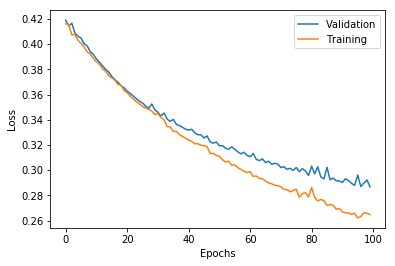

In [29]:
with open('./%s/hist_0.json' % path_info['model_info']['model_dir'], 'r') as f:
    history = json.load(f)
    
plt.plot(history['val_loss'], label='Validation')
plt.plot(history['loss'], label='Training')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 6. Load the pre-trained network for testing

If you want to test the trained model, you can use the `deepbiome_test` function. If you use the index file, this function provide the evaluation using test index (index set not included in the index file) for each fold. If not, this function provide the evaluation using the whole samples. If `number_of_fold` is setted as `k`, the function will test the model only with first `k` folds.

In [30]:
test_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'lr': '0.01',
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure',
        'network_class': 'DeepBiomeNetwork',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'normalizer': 'normalize_minmax',
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [31]:
test_path_info = {
    'data_info': {
        'count_list_path': resource_filename('deepbiome', 'tests/data/gcount_list.csv'),
        'count_path': resource_filename('deepbiome', 'tests/data/count'),
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'idx_path': resource_filename('deepbiome', 'tests/data/classification_idx.csv'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': '',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'evaluation': 'eval.npy',
        'model_dir': './example_result/',
        'weight': 'weight.h5'
    }
}

In [32]:
evaluation = deepbiome.deepbiome_test(log, test_network_info, test_path_info, number_of_fold=3)

[root    |INFO|deepbiome.py:262] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:294] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:296] -------1 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 1 fold testing
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic tree information from /DATA/home/muha/github_

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 283us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.22127509117126465!
[root    |INFO|build_network.py:183] Evaluation: [0.2787688076496124, 0.8759999871253967, 0.9585798978805542, 0.7037037014961243, 0.8213136792182922, 0.9507268667221069]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.6310412883758545
[root    |INFO|deepbiome.py:323] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:296] -------2 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 2 fold test

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 457us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.31082844734191895!
[root    |INFO|build_network.py:183] Evaluation: [0.2848759889602661, 0.9079999923706055, 0.959770143032074, 0.7894737124443054, 0.8704673051834106, 0.9521324634552002]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.7521309852600098
[root    |INFO|deepbiome.py:323] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:296] -------3 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 3 fold testi

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:177] Evaluation start!


250/250 [==============================] - 0s 336us/step


[root    |INFO|build_network.py:182] Evaluation end with time 0.26335835456848145!
[root    |INFO|build_network.py:183] Evaluation: [0.2259432077407837, 0.9279999732971191, 0.9606741666793823, 0.8472222089767456, 0.9021665453910828, 0.9655118584632874]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.9530818462371826
[root    |INFO|deepbiome.py:323] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:326] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:328] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:331]       mean : [0.263196   0.90399998 0.95967474 0.78013321 0.86464918 0.95612373]
[root    |INFO|deepbiome.py:332]        std : [0.02645943 0.0214165  0.00085764 0.05896227 0.03326344 0.00666316]
[root    |INFO|deepbiome.py:333] ---------------------------------------------------------------

This function provides the evaluation result as a numpy array with a shape of (number of fold, number of evaluation measures).

In [33]:
print('      %s' % ''.join(['%16s'%'loss']+ ['%16s'%s.strip() for s in network_info['model_info']['metrics'].split(',')]))
print('Mean: %s' % ''.join(['%16.4f'%v for v in np.mean(evaluation, axis=0)]))
print('Std : %s' % ''.join(['%16.4f'%v for v in np.std(evaluation, axis=0)]))

                  loss binary_accuracy     sensitivity     specificity        gmeasure             auc
Mean:           0.2632          0.9040          0.9597          0.7801          0.8646          0.9561
Std :           0.0265          0.0214          0.0009          0.0590          0.0333          0.0067


## 7. Load the pre-trained network for prediction

For prediction using the pre-trained model, we can use the `deepbiome_prediction` function. If `number_of_fold` is set to `k`, the function will predict only with first `k` folds sample's outputs.

In [34]:
prediction_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [35]:
prediction_path_info = {
    'data_info': {
        'count_list_path': resource_filename('deepbiome', 'tests/data/gcount_list.csv'),
        'count_path': resource_filename('deepbiome', 'tests/data/count'),
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': '',
    },
    'model_info': {
        'model_dir': './example_result/',
        'weight': 'weight_0.h5'
    }
}

In [36]:
prediction = deepbiome.deepbiome_prediction(log, prediction_network_info, prediction_path_info,
                                            num_classes = 1, number_of_fold=3)

[root    |INFO|deepbiome.py:393] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:420] -------1 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 1 fold testing
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:518] Phylogenetic tree

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:197] Prediction start!


1000/1000 [==============================] - 0s 47us/step


[root    |INFO|build_network.py:202] Prediction end with time 0.050612688064575195!
[root    |INFO|deepbiome.py:444] Compute time : 1.2163026332855225
[root    |INFO|deepbiome.py:445] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:420] -------2 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 2 fold testing
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:197] Prediction start!


1000/1000 [==============================] - 0s 47us/step


[root    |INFO|build_network.py:202] Prediction end with time 0.050907135009765625!
[root    |INFO|deepbiome.py:444] Compute time : 1.1867918968200684
[root    |INFO|deepbiome.py:445] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:420] -------3 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 3 fold testing
[root    |INFO|build_network.py:513] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:514] Read phylogenetic 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:197] Prediction start!


1000/1000 [==============================] - 0s 26us/step


[root    |INFO|build_network.py:202] Prediction end with time 0.02785348892211914!
[root    |INFO|deepbiome.py:444] Compute time : 1.1357481479644775
[root    |INFO|deepbiome.py:445] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:449] Total Computing Ended
[root    |INFO|deepbiome.py:450] -----------------------------------------------------------------


In [37]:
prediction.shape

(3, 1000, 1)

In [38]:
prediction[0,:10]

array([[0.78799784],
       [0.9245996 ],
       [0.1545347 ],
       [0.14412734],
       [0.9911699 ],
       [0.98303807],
       [0.1934169 ],
       [0.14412734],
       [0.979736  ],
       [0.9812544 ]], dtype=float32)